# Evaluación 1 - Diplomado Data Science Duoc UC

# Módulo: Machine Learning

A continuación, aplicarás lo aprendido con el uso de las librerías de Python desde fuentes de datos proporcionadas por el relator.

**Recuerda almacenar una copia de este Jupyter Notebook en tu Google Drive para poder ejecutar los bloques de código.**


---
* Ejecución técnica de un procedimiento de  Análisis Exploratorio de datos
  * Deberá cargar los datos del CSV a pandas
  * Deberá identificar las columnas relevantes y realizar la unión de los datos
  * Deberá identificar las columnas más relevantes del negocio y proponer una rutina de limpieza
  * Separar la información entre las columnas relevantes y ejecutar su rutina de limpieza
  * Identificar la correlación de las columnas e identificar las más relevantes
  * Proponga 5 gráficos que otorguen valor a los datos y describa el conocimiento que puede extraer de éstos
---


# Contexto: 

Una empresa anónima, nos encargó la importante misión de predecir como serán sus próximas ventas basados en sus datos transaccionales. Para falicitar el proyecto de Análisis de Datos, nos proporcionó 3 datasets que necesitaremos relacionar para poder responder a la demanda de nuestro cliente. 
La primera fase de nuestro proyecto consistirá en un análisis exploratorio que nos permitirá conocer del negocio, saber qué venden, cuantos clientes manejan en sus sistemas, entre otras preguntas relevantes que nos permitirán plantear diversas hipótesis respecto de los datos. 

**Recuerda hacer uso de todo lo aprendido! mientras más cosas descubras de los datos, más robusto será tu análisis.** 

# Análisis Exploratorio de Datos

## Importar las librerias necesarias

In [2]:
# Importe las librerias necesarias para trabajar aquí
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import re as re

## Cargar fuentes de datos

In [3]:
# Cargue los archivos CSV necesarios aquí
clientes = pd.read_csv('datos_clientes.csv') #Carga datos_clientes.csv
trabajadores = pd.read_csv('datos_trabajador.csv') #Carga datos_trabajador.csv
ventas = pd.read_csv('datos_ventas.csv',sep='|') #Carga datos_ventas.csv

# Análisis dataset clientes

* 12 filas, 500 columnas
* Columnas explicativas a analizar: 
    - Cantidad de hijos
    - Edad
    - Genero
    - Estado Civil
* Columnas que podrían ser explicativas cuando el modelo alcance un nivel superior de madurez (serán removidas del modelo inicial):
    - Idioma
    - Estudios
* Columna color favorito potencialmente podría ser utilizada por especialistas en psicología del color. Útil para estudiar correlación entre color favorito y preferencia de productos.
* Columnas a eliminar:
    - Correo
    - Nombres y apellidos (se unificará en una sola columna)
    - ID Cliente (se eliminará en el merge final)

In [6]:
# Realice análisis de los datos del CSV 1
clientes.head(4).columns

Index(['id_cliente', 'primer_nombre', 'apellido_paterno', 'apellido_materno',
       'correo', 'genero', 'idioma', 'estado_civil', 'cant_hijos', 'edad',
       'estudios', 'Color_F'],
      dtype='object')

In [4]:
# 12 columnas, 500 filas
clientes.shape

(500, 12)

In [5]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id_cliente        500 non-null    int64 
 1   primer_nombre     500 non-null    object
 2   apellido_paterno  500 non-null    object
 3   apellido_materno  500 non-null    object
 4   correo            500 non-null    object
 5   genero            500 non-null    object
 6   idioma            500 non-null    object
 7   estado_civil      500 non-null    object
 8   cant_hijos        500 non-null    int64 
 9   edad              500 non-null    int64 
 10  estudios          500 non-null    object
 11  Color_F           500 non-null    object
dtypes: int64(3), object(9)
memory usage: 47.0+ KB


In [6]:
clientes.describe()

,id_cliente,cant_hijos,edad
count,500.000000,500.000000,500.000000
mean,250.500000,2.500000,32.100000
std,144.481833,1.119154,18.557445
min,1.000000,1.000000,1.000000
25%,125.750000,1.750000,16.000000
50%,250.500000,2.500000,32.000000
75%,375.250000,3.250000,48.000000
max,500.000000,4.000000,65.000000


In [7]:
clientes.genero.value_counts()

Male      260
Female    240
Name: genero, dtype: int64

In [8]:
clientes.estado_civil.value_counts()

Otro       127
Viudo      126
Soltero    124
Casado     123
Name: estado_civil, dtype: int64

In [9]:
clientes.idioma.value_counts()

Kannada           12
Irish Gaelic      10
Haitian Creole     9
Czech              9
Northern Sotho     9
                  ..
Danish             2
Hiri Motu          2
Malagasy           2
Croatian           1
Azeri              1
Name: idioma, Length: 97, dtype: int64

In [10]:
clientes.columns.to_list()

['id_cliente',
 'primer_nombre',
 'apellido_paterno',
 'apellido_materno',
 'correo',
 'genero',
 'idioma',
 'estado_civil',
 'cant_hijos',
 'edad',
 'estudios',
 'Color_F']

### Removemos columnas de dataset clientes que no serán utilizadas

In [11]:
clientes['cliente'] = clientes.apellido_paterno + ", "  + clientes.primer_nombre
clientes.drop(labels = ["primer_nombre",'apellido_paterno','apellido_materno', 'correo', 'estudios'], axis = 1, inplace = True)
clientes.head()

,id_cliente,genero,idioma,estado_civil,cant_hijos,edad,Color_F,cliente
0,1,Female,Lithuanian,Otro,1,1,Celeste,"Plewes, Ibby"
1,2,Female,Armenian,Viudo,2,2,Azul,"Ewell, Doralia"
2,3,Female,Papiamento,Soltero,3,3,Celeste,"Merrydew, Lynette"
3,4,Female,Georgian,Casado,4,4,Azul,"Jeffryes, Janaye"
4,5,Male,Northern Sotho,Casado,1,5,Amarrillo,"Divis, Travus"


##### En el dataset de clientes no hay valores nulos. Información 100% íntegra

# Análisis dataset Trabajadores

* 5 filas, 5 columnas
* Dataset simple con la información de los cajeros
* Columnas explicativas a analizar: 
    - Nombre completo del cajero
* Columnas a eliminar:
    - ID
    - Cajero ID
    - Nombres y apellidos (se unificará en una sola columna)
    - RUT
    

In [12]:
# Realice análisis de los datos del CSV 2
trabajadores.head()

,ID,CAJERO_ID,NOMBRE,APELLIDO,RUT
0,1,2,Zelda,Wiggins,23730488-8
1,2,3,Kaye,Bird,18659842-3
2,3,4,Sean,Tucker,12534101-2
3,4,5,Ulric,Lester,14004608-6
4,5,7,Hunter,Booth,13030165-7


In [13]:
trabajadores.shape

(5, 5)

In [14]:
trabajadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         5 non-null      int64 
 1   CAJERO_ID  5 non-null      int64 
 2   NOMBRE     5 non-null      object
 3   APELLIDO   5 non-null      object
 4   RUT        5 non-null      object
dtypes: int64(2), object(3)
memory usage: 328.0+ bytes


### Removemos columnas de dataset trabajadores que no serán utilizadas

In [15]:
trabajadores['cajero'] = trabajadores.APELLIDO + ", " + trabajadores.NOMBRE
trabajadores.drop(labels=['NOMBRE', 'APELLIDO', 'RUT'], axis=1, inplace=True)
trabajadores.head()

,ID,CAJERO_ID,cajero
0,1,2,"Wiggins, Zelda"
1,2,3,"Bird, Kaye"
2,3,4,"Tucker, Sean"
3,4,5,"Lester, Ulric"
4,5,7,"Booth, Hunter"


# Análisis dataset Trabajadores

* 1753 filas, 10 columnas
* Dataset que contiene los registros de venta
* Columnas a analizar: 
    - Nombre Familia
    - Cantidad
    - Monto Total
* Columnas a eliminar:
    - Venta ID 
    - Cajero ID (post merge)
    - Comprador ID (post merge)
    - Código Producto
    - Código Familia
* Columna Fecha Venta se conservará para entender el comportamiento de las ventas en el tiempo
* Tanto para la columna fecha como monto deben limpiarse caracteres no óptimos para el análisis
* Existen muchos registros de venta de producto *TRIAL* se debe investigar porqué viene así desde el origen
    

In [16]:
# Realice análisis de los datos del CSV 3
ventas.head()

,VENTA_ID,CAJERO_ID,COMPRADOR_ID,FECHA_VENTA,MONTO_TOTAL,CODIGO_PRODUCTO,NOMBRE_PRODUCTO,CODIGO_FAMILIA,NOMBRE_FAMILIA,CANTIDAD
0,26,7,32,"22/08/19 19:43:18,000000000",Q.-1500.,7802215104855,Costa Rama,4,CONFITES-GALLETAS,"1,0"
1,49,7,91,"23/08/19 14:08:25,000000000",Q.4050-.,7801810712663,LIPTON YELLOW 40g. 20UN.,1,OFERTAS ESPECIALES,"1,0"
2,49,7,399,"23/08/19 14:08:25,000000000",Q.4050-.,7802575006035,CORBATAS CARO.400g.,1,OFERTAS ESPECIALES,"1,0"
3,49,7,92,"23/08/19 14:08:25,000000000",Q.4050-.,7801875032010,TÉ SUPREMO 40g. 20UN.,1,OFERTAS ESPECIALES,"1,0"
4,49,7,177,"23/08/19 14:08:25,000000000",Q.4050-.,7808743601934,ACEITE MERKAT 900ml.,1,OFERTAS ESPECIALES,"1,0"


In [17]:
ventas.shape

(1753, 10)

In [18]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   VENTA_ID         1753 non-null   int64 
 1   CAJERO_ID        1753 non-null   int64 
 2   COMPRADOR_ID     1753 non-null   int64 
 3   FECHA_VENTA      1753 non-null   object
 4   MONTO_TOTAL      1753 non-null   object
 5   CODIGO_PRODUCTO  1753 non-null   object
 6   NOMBRE_PRODUCTO  1753 non-null   object
 7   CODIGO_FAMILIA   1753 non-null   int64 
 8   NOMBRE_FAMILIA   1753 non-null   object
 9   CANTIDAD         1753 non-null   object
dtypes: int64(4), object(6)
memory usage: 137.1+ KB


In [19]:
ventas.NOMBRE_PRODUCTO.value_counts()

* TRIAL * TRIAL * TR                      53
Huevo                                     45
* TRIAL * TRIAL * TRI                     39
* TRIAL * TRIAL * TRIAL * TR              31
PALL MALL AZUL DE 20                      29
                                          ..
POSTRE VIENNETTA VAINILLA 548g.            1
3 PAQUE. VIENESAS TIL                      1
JABON LIQUIDO BALLERINA 900ml              1
NESCAFE TRADICION 3EN1 24g                 1
PAÑALES DESECHABLES BABY SEC XXG 16UN.     1
Name: NOMBRE_PRODUCTO, Length: 495, dtype: int64

### Removemos columnas de dataset ventas que no serán utilizadas

In [20]:
ventas.drop(labels=['VENTA_ID', 'CODIGO_PRODUCTO', 'CODIGO_FAMILIA'],axis=1, inplace=True)
ventas.head()

,CAJERO_ID,COMPRADOR_ID,FECHA_VENTA,MONTO_TOTAL,NOMBRE_PRODUCTO,NOMBRE_FAMILIA,CANTIDAD
0,7,32,"22/08/19 19:43:18,000000000",Q.-1500.,Costa Rama,CONFITES-GALLETAS,"1,0"
1,7,91,"23/08/19 14:08:25,000000000",Q.4050-.,LIPTON YELLOW 40g. 20UN.,OFERTAS ESPECIALES,"1,0"
2,7,399,"23/08/19 14:08:25,000000000",Q.4050-.,CORBATAS CARO.400g.,OFERTAS ESPECIALES,"1,0"
3,7,92,"23/08/19 14:08:25,000000000",Q.4050-.,TÉ SUPREMO 40g. 20UN.,OFERTAS ESPECIALES,"1,0"
4,7,177,"23/08/19 14:08:25,000000000",Q.4050-.,ACEITE MERKAT 900ml.,OFERTAS ESPECIALES,"1,0"


### Procesamos la columna monto total

In [21]:
ventas['MONTO_TOTAL'] = ventas['MONTO_TOTAL'].map(lambda x: x.lstrip('Q.-').rstrip('-.'))
# Acá se debe tomar la decisión de conservar o descartar este registro (107.8)
ventas = ventas.replace(to_replace='107,8', value='107.8')
ventas['MONTO_TOTAL'] = pd.to_numeric(ventas['MONTO_TOTAL'])

In [22]:
ventas.CANTIDAD.value_counts()

1,0      1469
2,0       186
3,0        38
4,0        21
10,0       14
6,0         9
5,0         9
8,0         2
7,0         2
20,0        1
0,098       1
12,0        1
Name: CANTIDAD, dtype: int64

In [23]:
ventas.CANTIDAD =  ventas.CANTIDAD.str.replace(',', '.')
ventas.CANTIDAD = pd.to_numeric(ventas.CANTIDAD)
ventas.CANTIDAD.value_counts()

1.000     1469
2.000      186
3.000       38
4.000       21
10.000      14
6.000        9
5.000        9
8.000        2
7.000        2
20.000       1
0.098        1
12.000       1
Name: CANTIDAD, dtype: int64

In [24]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CAJERO_ID        1753 non-null   int64  
 1   COMPRADOR_ID     1753 non-null   int64  
 2   FECHA_VENTA      1753 non-null   object 
 3   MONTO_TOTAL      1753 non-null   float64
 4   NOMBRE_PRODUCTO  1753 non-null   object 
 5   NOMBRE_FAMILIA   1753 non-null   object 
 6   CANTIDAD         1753 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 96.0+ KB


## Unificamos los CSV con la función merge

In [25]:
# Unir los CSV aquí
# Mergeamos las ventas con el cajero que realizó la venta
data = ventas.merge(trabajadores, left_on="CAJERO_ID",right_on="CAJERO_ID", how="left")
# Mergeamos las ventas con el cliente que realizó la compra
data = data.merge(clientes, left_on='COMPRADOR_ID', right_on='id_cliente', how='left')
data.head()

,CAJERO_ID,COMPRADOR_ID,FECHA_VENTA,MONTO_TOTAL,NOMBRE_PRODUCTO,NOMBRE_FAMILIA,CANTIDAD,ID,cajero,id_cliente,genero,idioma,estado_civil,cant_hijos,edad,Color_F,cliente
0,7,32,"22/08/19 19:43:18,000000000",1500.0,Costa Rama,CONFITES-GALLETAS,1.0,5,"Booth, Hunter",32,Male,Pashto,Viudo,4,32,Azul,"Palia, Justus"
1,7,91,"23/08/19 14:08:25,000000000",4050.0,LIPTON YELLOW 40g. 20UN.,OFERTAS ESPECIALES,1.0,5,"Booth, Hunter",91,Female,Dhivehi,Casado,3,26,Rojo,"Quaife, Dela"
2,7,399,"23/08/19 14:08:25,000000000",4050.0,CORBATAS CARO.400g.,OFERTAS ESPECIALES,1.0,5,"Booth, Hunter",399,Male,Tswana,Casado,3,9,Azul,"Dilleston, Laird"
3,7,92,"23/08/19 14:08:25,000000000",4050.0,TÉ SUPREMO 40g. 20UN.,OFERTAS ESPECIALES,1.0,5,"Booth, Hunter",92,Male,Moldovan,Soltero,4,27,Otro,"Balbeck, Moe"
4,7,177,"23/08/19 14:08:25,000000000",4050.0,ACEITE MERKAT 900ml.,OFERTAS ESPECIALES,1.0,5,"Booth, Hunter",177,Male,Dzongkha,Casado,1,47,Morado,"Edworthye, Stacee"


### Eliminación de columnas que no serán utilizadas en el análisis

In [26]:
# Eliminamos columnas innecesarias
data.drop(labels = ['CAJERO_ID','COMPRADOR_ID', 'id_cliente', 'ID'], axis = 1, inplace = True)
data.head()

,FECHA_VENTA,MONTO_TOTAL,NOMBRE_PRODUCTO,NOMBRE_FAMILIA,CANTIDAD,cajero,genero,idioma,estado_civil,cant_hijos,edad,Color_F,cliente
0,"22/08/19 19:43:18,000000000",1500.0,Costa Rama,CONFITES-GALLETAS,1.0,"Booth, Hunter",Male,Pashto,Viudo,4,32,Azul,"Palia, Justus"
1,"23/08/19 14:08:25,000000000",4050.0,LIPTON YELLOW 40g. 20UN.,OFERTAS ESPECIALES,1.0,"Booth, Hunter",Female,Dhivehi,Casado,3,26,Rojo,"Quaife, Dela"
2,"23/08/19 14:08:25,000000000",4050.0,CORBATAS CARO.400g.,OFERTAS ESPECIALES,1.0,"Booth, Hunter",Male,Tswana,Casado,3,9,Azul,"Dilleston, Laird"
3,"23/08/19 14:08:25,000000000",4050.0,TÉ SUPREMO 40g. 20UN.,OFERTAS ESPECIALES,1.0,"Booth, Hunter",Male,Moldovan,Soltero,4,27,Otro,"Balbeck, Moe"
4,"23/08/19 14:08:25,000000000",4050.0,ACEITE MERKAT 900ml.,OFERTAS ESPECIALES,1.0,"Booth, Hunter",Male,Dzongkha,Casado,1,47,Morado,"Edworthye, Stacee"


In [27]:
# Reordenamos las columnas del dataset para facilitar su lectura
sales = data[['cajero', 'NOMBRE_FAMILIA','NOMBRE_PRODUCTO', 'CANTIDAD','MONTO_TOTAL','cliente', 'genero', 'idioma', 'estado_civil', 'cant_hijos', 'edad', 'Color_F', 'FECHA_VENTA']]
sales = sales[sales['CANTIDAD'] != 0.098]
sales.head()
sales.CANTIDAD.value_counts()

1.0     1469
2.0      186
3.0       38
4.0       21
10.0      14
6.0        9
5.0        9
8.0        2
7.0        2
20.0       1
12.0       1
Name: CANTIDAD, dtype: int64

In [28]:
# Renombramos columnas para estandarizar en notación húngara
sales.rename(columns={'NOMBRE_FAMILIA': 'nombre_familia', 'NOMBRE_PRODUCTO': 'nombre_producto', 
                        'CANTIDAD': 'cantidad', 'MONTO_TOTAL': 'monto_total', 'Color_F': 'color_fav', 'FECHA_VENTA': 'fecha_venta'}, inplace=True)
sales.head()

,cajero,nombre_familia,nombre_producto,cantidad,monto_total,cliente,genero,idioma,estado_civil,cant_hijos,edad,color_fav,fecha_venta
0,"Booth, Hunter",CONFITES-GALLETAS,Costa Rama,1.0,1500.0,"Palia, Justus",Male,Pashto,Viudo,4,32,Azul,"22/08/19 19:43:18,000000000"
1,"Booth, Hunter",OFERTAS ESPECIALES,LIPTON YELLOW 40g. 20UN.,1.0,4050.0,"Quaife, Dela",Female,Dhivehi,Casado,3,26,Rojo,"23/08/19 14:08:25,000000000"
2,"Booth, Hunter",OFERTAS ESPECIALES,CORBATAS CARO.400g.,1.0,4050.0,"Dilleston, Laird",Male,Tswana,Casado,3,9,Azul,"23/08/19 14:08:25,000000000"
3,"Booth, Hunter",OFERTAS ESPECIALES,TÉ SUPREMO 40g. 20UN.,1.0,4050.0,"Balbeck, Moe",Male,Moldovan,Soltero,4,27,Otro,"23/08/19 14:08:25,000000000"
4,"Booth, Hunter",OFERTAS ESPECIALES,ACEITE MERKAT 900ml.,1.0,4050.0,"Edworthye, Stacee",Male,Dzongkha,Casado,1,47,Morado,"23/08/19 14:08:25,000000000"


In [29]:
# Parseamos fecha a datetime
sales.fecha_venta = pd.to_datetime(sales.fecha_venta)

In [30]:
# Generamos columna año y mes
sales['year']  = pd.DatetimeIndex(sales['fecha_venta']).year
sales['month'] = pd.DatetimeIndex(sales['fecha_venta']).month
sales.head()

,cajero,nombre_familia,nombre_producto,cantidad,monto_total,cliente,genero,idioma,estado_civil,cant_hijos,edad,color_fav,fecha_venta,year,month
0,"Booth, Hunter",CONFITES-GALLETAS,Costa Rama,1.0,1500.0,"Palia, Justus",Male,Pashto,Viudo,4,32,Azul,2019-08-22 19:43:18,2019,8
1,"Booth, Hunter",OFERTAS ESPECIALES,LIPTON YELLOW 40g. 20UN.,1.0,4050.0,"Quaife, Dela",Female,Dhivehi,Casado,3,26,Rojo,2019-08-23 14:08:25,2019,8
2,"Booth, Hunter",OFERTAS ESPECIALES,CORBATAS CARO.400g.,1.0,4050.0,"Dilleston, Laird",Male,Tswana,Casado,3,9,Azul,2019-08-23 14:08:25,2019,8
3,"Booth, Hunter",OFERTAS ESPECIALES,TÉ SUPREMO 40g. 20UN.,1.0,4050.0,"Balbeck, Moe",Male,Moldovan,Soltero,4,27,Otro,2019-08-23 14:08:25,2019,8
4,"Booth, Hunter",OFERTAS ESPECIALES,ACEITE MERKAT 900ml.,1.0,4050.0,"Edworthye, Stacee",Male,Dzongkha,Casado,1,47,Morado,2019-08-23 14:08:25,2019,8


In [31]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1752 entries, 0 to 1752
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cajero           1752 non-null   object        
 1   nombre_familia   1752 non-null   object        
 2   nombre_producto  1752 non-null   object        
 3   cantidad         1752 non-null   float64       
 4   monto_total      1752 non-null   float64       
 5   cliente          1752 non-null   object        
 6   genero           1752 non-null   object        
 7   idioma           1752 non-null   object        
 8   estado_civil     1752 non-null   object        
 9   cant_hijos       1752 non-null   int64         
 10  edad             1752 non-null   int64         
 11  color_fav        1752 non-null   object        
 12  fecha_venta      1752 non-null   datetime64[ns]
 13  year             1752 non-null   int64         
 14  month            1752 non-null   int64  

## Analice los datos unidos, identifique columnas a limpiar y columnas a remover en caso de ser necesario. Justifique todas sus propuestas.

In [32]:
# Análisis de los datos aquí
sales.shape #Se conservan los 1753 registros de venta

(1752, 15)

In [33]:
sales.count()

cajero             1752
nombre_familia     1752
nombre_producto    1752
cantidad           1752
monto_total        1752
cliente            1752
genero             1752
idioma             1752
estado_civil       1752
cant_hijos         1752
edad               1752
color_fav          1752
fecha_venta        1752
year               1752
month              1752
dtype: int64

In [34]:
sales.describe()

,cantidad,monto_total,cant_hijos,edad,year,month
count,1752.000000,1752.000000,1752.000000,1752.000000,1752.0,1752.000000
mean,1.335616,3606.461187,2.468607,31.251712,2019.0,5.765982
std,1.191215,2885.255617,1.122501,18.363392,0.0,3.409937
min,1.000000,150.000000,1.000000,1.000000,2019.0,1.000000
25%,1.000000,1700.000000,1.000000,16.000000,2019.0,3.000000
50%,1.000000,2985.000000,2.000000,30.000000,2019.0,6.000000
75%,1.000000,4710.000000,3.000000,46.000000,2019.0,9.000000
max,20.000000,23520.000000,4.000000,65.000000,2019.0,12.000000


In [35]:
sales['genero'].value_counts()

Male      920
Female    832
Name: genero, dtype: int64

In [36]:
sales['cant_hijos'].value_counts()

1    459
2    439
3    428
4    426
Name: cant_hijos, dtype: int64

In [37]:
sales['nombre_familia'].value_counts()

OFERTAS ESPECIALES    961
CIGARROS              250
BEBIDAS COCA COLA     169
CONFITES-GALLETAS     122
LÁCTEOS                78
ART.LIMPIEZA           75
JUGOS-NECTAR           52
BEBIDAS C.C.U          37
ART.ASEO PERSONAL       8
Name: nombre_familia, dtype: int64

In [38]:
sales['nombre_producto'].value_counts() 

* TRIAL * TRIAL * TR                      53
Huevo                                     45
* TRIAL * TRIAL * TRI                     39
* TRIAL * TRIAL * TRIAL * TR              31
PALL MALL AZUL DE 20                      29
                                          ..
PRESTOBARBA XTREME 3 SCHICK 3UN.           1
3 PAQUE. VIENESAS TIL                      1
NESCAFE TRADICION 3EN1 24g                 1
CHANDELLE DE MANJAR NESTLE 130g.           1
PAÑALES DESECHABLES BABY SEC XXG 16UN.     1
Name: nombre_producto, Length: 494, dtype: int64

In [39]:
sales['color_fav'].value_counts()

Rojo         282
Verde        274
Morado       270
Otro         247
Azul         234
Celeste      225
Amarrillo    220
Name: color_fav, dtype: int64

<AxesSubplot:>

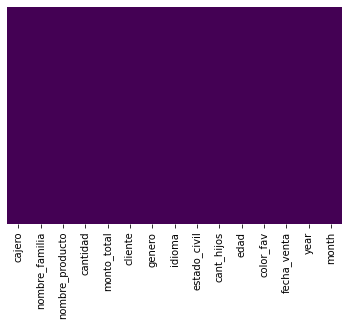

In [40]:
sbn.heatmap(sales.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')

In [41]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1752 entries, 0 to 1752
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cajero           1752 non-null   object        
 1   nombre_familia   1752 non-null   object        
 2   nombre_producto  1752 non-null   object        
 3   cantidad         1752 non-null   float64       
 4   monto_total      1752 non-null   float64       
 5   cliente          1752 non-null   object        
 6   genero           1752 non-null   object        
 7   idioma           1752 non-null   object        
 8   estado_civil     1752 non-null   object        
 9   cant_hijos       1752 non-null   int64         
 10  edad             1752 non-null   int64         
 11  color_fav        1752 non-null   object        
 12  fecha_venta      1752 non-null   datetime64[ns]
 13  year             1752 non-null   int64         
 14  month            1752 non-null   int64  

# Propuesta de limpieza


## Proponga al menos 3 tareas de limpieza

Escríbalas acá justificando el por qué se debe realizar cada limpieza. 
En los bloques posteriores, ejecute las rutinas propuestas.

### Ejecución de limpieza 1 

* Identificación de tipos de datos de cada columna: Nos permite conocer qué datos corresponden números, cuales a strings, cuales a booleanos, fechas etc
* Identifiación de valores núlos y no nulos en cada columna: Nos permite conocer la integridad de la información
* Tomar la decisión: ¿Imputar o eliminar la información del dataframe?: Se debe definir la factibilidad de inferir el valor de un dato vacío, 
        o bien deshacerse de éste, en función de su nivel de importancia dentro del modelo.

### Ejecución de limpieza 2 

* Remover variables no explicativas: Aquellas columnas que no aporten valor al modelo deben ser purgadas de este
* Mantener variables categóricas: Las variables categóricas permiten saber cómo se segmenta la información


### Ejecución de limpieza 3 

* Unificar columnas: En el caso de este ejercicio, la columna nombre_cliente y nombre_cajero fue obtenida desde las variables de cada dataframe, lo cual nos habilita para prescindir de 5 columnas, obteniendo el mismo valor desde solamente 2.
* Generar columnas calculadas: El generar operaciones entre variables numéricas (p ej. cantidad * precio unitario = precio_total) nos permite enfocar el análisis hacia números más generales.
* Estandarizar: dentro de lo posible, generar un estándar para nombrar las columnas (camel case, notación húngara, entre otros). Esto hará mucho más cómodo manipular la información.
* Eliminar columnas que no aporten valor al modelo-

## Identificación de correlación en las columnas

In [42]:
sales.describe()

,cantidad,monto_total,cant_hijos,edad,year,month
count,1752.000000,1752.000000,1752.000000,1752.000000,1752.0,1752.000000
mean,1.335616,3606.461187,2.468607,31.251712,2019.0,5.765982
std,1.191215,2885.255617,1.122501,18.363392,0.0,3.409937
min,1.000000,150.000000,1.000000,1.000000,2019.0,1.000000
25%,1.000000,1700.000000,1.000000,16.000000,2019.0,3.000000
50%,1.000000,2985.000000,2.000000,30.000000,2019.0,6.000000
75%,1.000000,4710.000000,3.000000,46.000000,2019.0,9.000000
max,20.000000,23520.000000,4.000000,65.000000,2019.0,12.000000


In [43]:
# Identifique las correlación aquí
r = np.corrcoef(sales['monto_total'], sales['cant_hijos'])
r


array([[1.        , 0.00817768],
       [0.00817768, 1.        ]])

In [44]:
sales['monto_total'].corr(sales['cant_hijos'])

0.008177683736473441

In [45]:
sales['cantidad'].corr(sales['monto_total'])

-0.0013856789234023815

In [46]:
sales['monto_total'].corr(sales['cant_hijos'], method='spearman')

0.018234593687366248

In [47]:
sales['monto_total'].corr(sales['cant_hijos'], method='kendall')

0.013511943171155194

In [48]:
sales['monto_total'].corr(sales['estado_civil'], method='spearman')

-0.02096901976922005

In [49]:
sales['monto_total'].corr(sales['genero'], method='spearman')

0.02983135835125728

In [50]:
sales['cantidad'].corr(sales['nombre_familia'], method='spearman')

0.1981422872874258

In [51]:
sales['edad'].corr(sales['nombre_producto'], method='spearman')

-0.019539581530774886

# Escribir una pequeña reseña de los resultados analizados y las correlaciones que  usaría para implementar un modelo de Machine Learning.

* La edad de los compradores oscila entre los 1 y los 65 años, con una media de 31.2 años
* El estado civil de los compradores se distribuye así: 457 compradores son viudos, 449 solteros, 429 casados y 417 desconocido.
* En promedio, los compradores tienen 2.5 hijos, con un espectro entre [1, 4]
* 920 compradores son hombres, mientras que 832 mujeres, mientras que la media de compras hombres es ligeramente superior a la de las mujeres
* El color predilecto de los compradores es el rojo.
* El total de ventas en 2019 fue de $6,318,520

Existen varias correlaciones a considerar, por ejemplo las siguientes:

* Correlación entre cantidad de hijos y familia de productos
* Correlación entre estado civil y familia de productos
* Correlación entre el monto de la compra y el estado civil
* Correlación entre el cantidad de hijos y cantidad de productos que se compran
* Correlación entre la edad y los productos de preferencia en un segmento etario

In [52]:
sales_by_month = sales.groupby(by=['month'])['monto_total'].sum()
sales_by_month

month
1     1006120.0
2      461410.0
3      702070.0
4      533210.0
5      340490.0
6      340300.0
7      117610.0
8      933420.0
9     1325910.0
10     156650.0
11     187950.0
12     213380.0
Name: monto_total, dtype: float64

## Proponga y describa al menos 5 gráficos que entregan valor al negocio y a la interpretación de los datos

#### Preprocesamiento de la data

In [53]:
sales.head()

,cajero,nombre_familia,nombre_producto,cantidad,monto_total,cliente,genero,idioma,estado_civil,cant_hijos,edad,color_fav,fecha_venta,year,month
0,"Booth, Hunter",CONFITES-GALLETAS,Costa Rama,1.0,1500.0,"Palia, Justus",Male,Pashto,Viudo,4,32,Azul,2019-08-22 19:43:18,2019,8
1,"Booth, Hunter",OFERTAS ESPECIALES,LIPTON YELLOW 40g. 20UN.,1.0,4050.0,"Quaife, Dela",Female,Dhivehi,Casado,3,26,Rojo,2019-08-23 14:08:25,2019,8
2,"Booth, Hunter",OFERTAS ESPECIALES,CORBATAS CARO.400g.,1.0,4050.0,"Dilleston, Laird",Male,Tswana,Casado,3,9,Azul,2019-08-23 14:08:25,2019,8
3,"Booth, Hunter",OFERTAS ESPECIALES,TÉ SUPREMO 40g. 20UN.,1.0,4050.0,"Balbeck, Moe",Male,Moldovan,Soltero,4,27,Otro,2019-08-23 14:08:25,2019,8
4,"Booth, Hunter",OFERTAS ESPECIALES,ACEITE MERKAT 900ml.,1.0,4050.0,"Edworthye, Stacee",Male,Dzongkha,Casado,1,47,Morado,2019-08-23 14:08:25,2019,8


In [54]:
grouper_columns =['genero','estado_civil', 'color_fav', 'cant_hijos', 'year', 'month']
grouped_sales = sales.groupby(by=grouper_columns)['monto_total'].sum().reset_index()
grouped_sales.head(20)

,genero,estado_civil,color_fav,cant_hijos,year,month,monto_total
0,Female,Casado,Amarrillo,1,2019,2,1390.0
1,Female,Casado,Amarrillo,1,2019,3,5950.0
2,Female,Casado,Amarrillo,1,2019,8,22330.0
3,Female,Casado,Amarrillo,1,2019,9,10240.0
4,Female,Casado,Amarrillo,1,2019,12,1000.0
5,Female,Casado,Amarrillo,2,2019,4,2180.0
6,Female,Casado,Amarrillo,2,2019,6,14040.0
7,Female,Casado,Amarrillo,2,2019,12,1500.0
8,Female,Casado,Amarrillo,3,2019,1,5700.0
9,Female,Casado,Amarrillo,3,2019,9,11180.0


# Gráfico 1

In [55]:
sales.describe()

,cantidad,monto_total,cant_hijos,edad,year,month
count,1752.000000,1752.000000,1752.000000,1752.000000,1752.0,1752.000000
mean,1.335616,3606.461187,2.468607,31.251712,2019.0,5.765982
std,1.191215,2885.255617,1.122501,18.363392,0.0,3.409937
min,1.000000,150.000000,1.000000,1.000000,2019.0,1.000000
25%,1.000000,1700.000000,1.000000,16.000000,2019.0,3.000000
50%,1.000000,2985.000000,2.000000,30.000000,2019.0,6.000000
75%,1.000000,4710.000000,3.000000,46.000000,2019.0,9.000000
max,20.000000,23520.000000,4.000000,65.000000,2019.0,12.000000


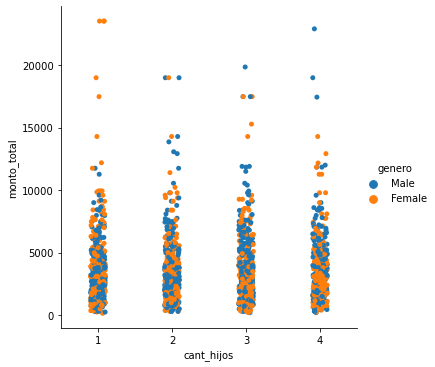

In [56]:
# Programe el gráfico 1

sbn.catplot(x="cant_hijos", y="monto_total", hue="genero", data=sales)

### Descripción

* En este gráfico podemos apreciar la distribución de las ventas según cantidad de hijos y el monto total de la compra.
* Se observa una media de compra de $3600, distribuida fuertemente entre $1700 y $4710 (percentil 25% y 75% respectivamente)
* La cantidad de compras según cantidad de hijos es bastante equilibrada
    - 1 459
    - 2 439
    - 3 428
    - 4 427

# Gráfico 2

<AxesSubplot:xlabel='estado_civil', ylabel='monto_total'>

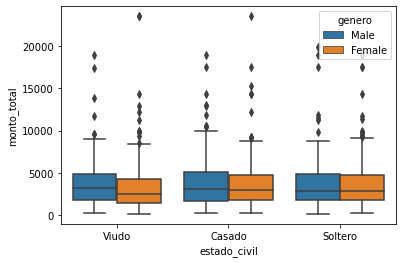

In [57]:
# Programe el gráfico 2
sbn.boxplot(x="estado_civil", y="monto_total", hue="genero", data=sales[sales['estado_civil'] != 'Otro'])


#### Descripción


* En este gráfico podemos apreciar la distribución de las ventas según estado civil y género (se excluye estado_civil=Otro)
* Las personas casadas generan el mayor volumen de ventas
* En los solteros se aprecia una gran igualdad entre las compras de hombres y mujeres
* Las personas viudas tienen el menor nivel de compras, pero se aprecia una mayor desviación que los hombres

# Gráfico 3

In [58]:
sales_by_month = sales.groupby(by=['month', 'genero'])['monto_total'].sum().reset_index()
print("Promedio Mensual de ventas " + str(np.round(np.mean(sales_by_month['monto_total']), decimals=0)))
sales_by_month

Promedio Mensual de ventas 263272.0


,month,genero,monto_total
0,1,Female,424510.0
1,1,Male,581610.0
2,2,Female,203880.0
3,2,Male,257530.0
4,3,Female,380770.0
5,3,Male,321300.0
6,4,Female,256440.0
7,4,Male,276770.0
8,5,Female,164350.0
9,5,Male,176140.0


<AxesSubplot:xlabel='month', ylabel='monto_total'>

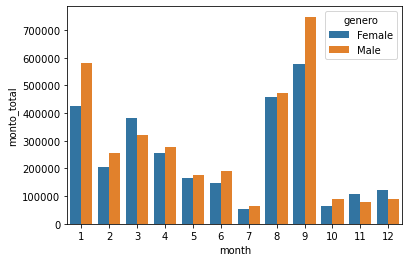

In [59]:
# Programe el gráfico 3

sbn.barplot(data=sales_by_month, x='month', y='monto_total', ci=None,estimator=sum, hue='genero')

#### Descripción

* Los meses peak de venta son Enero, Agosto y Septiembre. 
* El promedio mensual de ventas es de 526633.0
* Parece preocupante el bajo nivel de ventas en los últimos meses del año, principalmente en diciembre ya que es época de festividades
* Las mujeres compran en mayor cantidad en marzo, noviembre y diciembre, mientras que los hombres en enero y septiembre

# Gráfico 4

In [60]:
sales_by_color = sales.groupby(by=['genero','color_fav'])['cajero'].count().reset_index()
sales_by_color
#grouped_sales = sales.groupby(by=grouper_columns)['monto_total'].sum().reset_index()


,genero,color_fav,cajero
0,Female,Amarrillo,93
1,Female,Azul,115
2,Female,Celeste,99
3,Female,Morado,135
4,Female,Otro,115
5,Female,Rojo,139
6,Female,Verde,136
7,Male,Amarrillo,127
8,Male,Azul,119
9,Male,Celeste,126


<AxesSubplot:xlabel='color_fav', ylabel='cajero'>

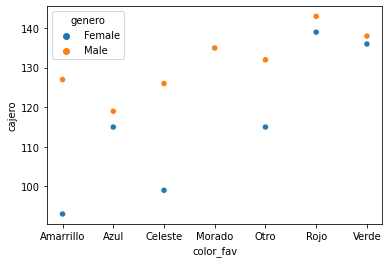

In [61]:
# Programe el gráfico 4
sbn.scatterplot(data=sales_by_color, x='color_fav', y='cajero', hue='genero')

# Descripción

* El color favorito de hombres y mujeres es el rojo, seguido del verde 
* Los colores menos llamativos para las mujeres son el amarillo y el celeste, mientras que en los hombres no se aprecia mayor desviación

# Gráfico 5

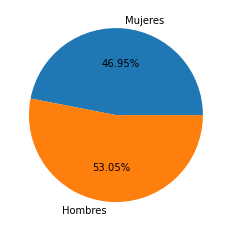

In [62]:
sales_by_sex = sales.groupby(by=['genero'])['monto_total'].sum().reset_index()
fig , ax = plt.subplots()
ax.pie(sales_by_sex['monto_total'],labels = ['Mujeres','Hombres'],autopct='%1.2f%%',shadow = False)
plt.show()

In [63]:
sales_by_civil_status = sales.groupby(by=['estado_civil'])['monto_total'].sum().reset_index()
sales_by_civil_status.value_counts()


estado_civil  monto_total
Casado        1609370.0      1
Otro          1461870.0      1
Soltero       1639880.0      1
Viudo         1607400.0      1
dtype: int64

<AxesSubplot:xlabel='cajero', ylabel='monto_total'>

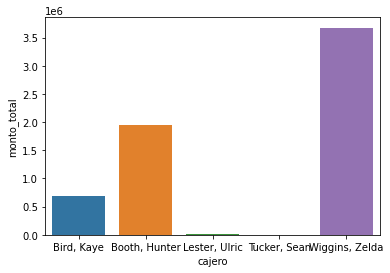

In [64]:
sales_by_seller = sales.groupby(by=['cajero'])['monto_total'].sum().reset_index()
fig , ax = plt.subplots()
sbn.barplot(data=sales_by_seller, x='cajero', y='monto_total', ci=None,estimator=sum)

#### Descripción

* Los hombres concentran 53% del total de compras, mientras que las mujeres un 47%
* Las ventas según estado civil son prácticamente homogéneas
* Zelda Wiggins es el cajero con la mayor concentración de ventas

# Detalle aquí las conclusiones obtenidas respecto al dataset. Explique y complemente el análisis recalcando la importancia de la exploración de datos antes de comenzar a realizar modelos de Machine Learning.

En síntesis, el dataset analizado corresponde a información de ventas realizadas en un supermercado durante el año 2019.

Durante este análisis pudimos conocer información acerca de los compradores y sus preferencias.

* La edad de los compradores oscila entre los 1 y los 65 años, con una media de 31.2 años
* En promedio, los compradores tienen 2.5 hijos, con un espectro entre [1, 4]
* 920 compradores son hombres, mientras que 832 mujeres, mientras que la media de compras hombres es ligeramente superior a la de las mujeres
* El color predilecto de los compradores es el rojo.
* El total de ventas en 2019 fue de $6,318,520

A fin a modelos de machine learning, es de suma importancia realizar un análisis previo y preprocesamiento de la información, ya que gracias a esta actividad es posible obtener modelos limpios.

De esta manera es posible establecer correlaciones entre variables y distinguir patrones y definir algoritmos predictivos en un dataset tan homogéneo como este, y poder responder preguntas tales como:

¿Cuál será mi volumen de ventas en un futuro?
¿Qué productos serán comprados con mayor freciencia?
¿Con qué productos tengo que abastecerme para determinadas épocas del año?
¿Con qué facilidad un nuevo producto entrará al mercado?
¿Cómo impactará en las ventas y en mi clientela la disminución o aumento en el precio de un determinado producto?

Entre otras más que dependerán de las necesidades y objetivos del negocio y/o disciplina

El data wrangling es una disciplina clave de cara a obtener datos límpios y optimizadores, resultados realistas, para de esta manera mejorar el umbral de confianza de los modelos que se deseen implementar.